In [1]:
%matplotlib inline
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pylab
import utils
import os.path

## Load metadata files

In [2]:
# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')

('track', 'tags')
('album', 'tags')
('artist', 'tags')
('track', 'genres')
('track', 'genres_all')


/Users/iaakhter/Documents/UBC/Winter22017/532L/DreamingInMusic/utils.py:218: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


## Collect track ids of rock, hiphop and pop genres

In [3]:
rockGenreIds = []
hiphopGenreIds = []
popGenreIds = []
for key in tracks['track','genres'].keys():
    if len(tracks['track','genres'][key]) >= 1:
        if tracks['track','genres'][key][0] == 12:
            rockGenreIds.append(key)
        if tracks['track','genres'][key][0] == 21:
            hiphopGenreIds.append(key)
        if tracks['track','genres'][key][0] == 10:
            popGenreIds.append(key)
print ("example of rock genre tracks")
print (rockGenreIds[0:1000])
print ("example of hiphop genre tracks")
print (hiphopGenreIds[0:1000])
print ("example of pop genre tracks")
print (popGenreIds[0:1000])

example of rock genre tracks
[246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 393, 394, 395, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 575, 576, 577, 578, 605, 606, 607, 608, 609, 633, 634, 635, 690, 691, 692, 693, 719, 720, 721, 722, 723, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 824, 825, 826, 827, 828, 829, 830, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 850, 851, 852, 855, 856, 857, 858, 859, 860, 861, 862, 863, 991, 992, 993, 1007, 1009, 1013, 1027, 1028, 1029, 1049, 1050, 1052, 1077, 1078, 1079, 1080, 1081, 1087, 1102, 1105, 1106, 1107, 1108, 1116, 1117, 1118, 1119, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1133, 1135, 1136, 1138, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 11

## Convert the first few rock, hiphop and pop tracks to spectograms and save them in appropriate directories

In [ ]:
rockGenreIds = rockGenreIds
hiphopGenreIds = hiphopGenreIds
popGenreIds = popGenreIds
audioDirectory = "data/fma_small/"
spectroDirectory = "data/fma_small_spectro/"
numSpectro = 0
for rockId in rockGenreIds:
    rockId = str(rockId)
    while(len(rockId) < 6):
        rockId = "0" + rockId
    #print (rockId)
    filename = rockId[0:3]+"/"+rockId
    audioFilename = audioDirectory + filename + ".mp3"
    #print (audioFilename)
    spectroFilename = spectroDirectory + filename + ".jpg"
    #print (spectroFilename)
    if os.path.isfile(audioFilename):
        pylab.figure()
        x, sr = librosa.load(audioFilename, sr=None, mono=True)
        #stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
        #mel = librosa.core.stft(sr=sr, S=stft**2)
        spectro = librosa.core.stft(x)

        pylab.axis('off') # no axis
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(librosa.power_to_db(spectro, ref=np.max))
        pylab.savefig(spectroFilename, bbox_inches=None, pad_inches=0)
        pylab.close()
        numSpectro += 1
        print ("numSpectro", numSpectro)
        if numSpectro >= 500:
            break
        
print ("done with rock")
        
for hiphopId in hiphopGenreIds:
    hiphopId = str(hiphopId)
    while(len(hiphopId) < 6):
        hiphopId = "0" + hiphopId
    #print (rockId)
    filename = hiphopId[0:3]+"/"+hiphopId
    audioFilename = audioDirectory + filename + ".mp3"
    #print (audioFilename)
    spectroFilename = spectroDirectory + filename + ".jpg"
    #print (spectroFilename)
    if os.path.isfile(audioFilename):
        pylab.figure()
        x, sr = librosa.load(audioFilename, sr=None, mono=True)
        #stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
        #mel = librosa.core.stft(sr=sr, S=stft**2)
        spectro = librosa.core.stft(x)

        pylab.axis('off') # no axis
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(librosa.power_to_db(spectro, ref=np.max))
        pylab.savefig(spectroFilename, bbox_inches=None, pad_inches=0)
        pylab.close()
        numSpectro += 1
        print ("numSpectro", numSpectro)
        if numSpectro >= 500:
            break
        
print ("done with hiphop")
        
for popId in popGenreIds:
    popId = str(popId)
    while(len(popId) < 6):
        popId = "0" + popId
    #print (rockId)
    filename = popId[0:3]+"/"+popId
    audioFilename = audioDirectory + filename + ".mp3"
    #print (audioFilename)
    spectroFilename = spectroDirectory + filename + ".jpg"
    #print (spectroFilename)
    if os.path.isfile(audioFilename):
        pylab.figure()
        x, sr = librosa.load(audioFilename, sr=None, mono=True)
        #stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
        #mel = librosa.core.stft(sr=sr, S=stft**2)
        spectro = librosa.core.stft(x)

        pylab.axis('off') # no axis
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(librosa.power_to_db(spectro, ref=np.max))
        pylab.savefig(spectroFilename, bbox_inches=None, pad_inches=0)
        pylab.close()
        numSpectro += 1
        print ("numSpectro", numSpectro)
        if numSpectro >= 500:
            break
        
print ("done with pop")

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:863: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(magphase(D, power=2)[0]) instead.
  warnings.warn('power_to_db was called on complex input so phase '


numSpectro 1
numSpectro 2
numSpectro 3
numSpectro 4
numSpectro 5
numSpectro 6
numSpectro 7
numSpectro 8
numSpectro 9
numSpectro 10
numSpectro 11
numSpectro 12
numSpectro 13
numSpectro 14
numSpectro 15
numSpectro 16
numSpectro 17
numSpectro 18
numSpectro 19
numSpectro 20
numSpectro 21
numSpectro 22
numSpectro 23
numSpectro 24
numSpectro 25
numSpectro 26
numSpectro 27
numSpectro 28
numSpectro 29
numSpectro 30
numSpectro 31
numSpectro 32
numSpectro 33
numSpectro 34
numSpectro 35
numSpectro 36
numSpectro 37
numSpectro 38
numSpectro 39
numSpectro 40
numSpectro 41
numSpectro 42
numSpectro 43
numSpectro 44
numSpectro 45
numSpectro 46
numSpectro 47
numSpectro 48
numSpectro 49
numSpectro 50
numSpectro 51
numSpectro 52
numSpectro 53
numSpectro 54
numSpectro 55
numSpectro 56
numSpectro 57
numSpectro 58
numSpectro 59
numSpectro 60
numSpectro 61
numSpectro 62
numSpectro 63
numSpectro 64
numSpectro 65
numSpectro 66
numSpectro 67
numSpectro 68
numSpectro 69
numSpectro 70
numSpectro 71
numSpectro 72
n

## Example code for loading audio file and playing it

In [113]:
audioDirectory = "data/fma_small/"
fileName = "000/000255"
audioName = audioDirectory + fileName + ".mp3"
x, sr = librosa.load(audioName, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 0, 30
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

Duration: 29.99s, 1322496 samples


## Example code for converting spectogram back to audio file and playing it

powerToDb
[[-43.95143  -46.064735 -28.378609 ... -19.067362 -14.313644 -14.624919]
 [-44.87912  -42.24936  -28.243675 ... -14.731466 -12.89674  -18.953043]
 [-49.248756 -39.427902 -28.713446 ... -10.661632 -11.94172  -16.517147]
 ...
 [-80.       -64.72495  -61.05322  ... -43.127865 -40.401703 -40.65535 ]
 [-73.90991  -66.74268  -62.47602  ... -43.270184 -40.43517  -53.7668  ]
 [-72.58572  -72.90404  -64.10993  ... -43.26123  -40.452705 -40.642944]]


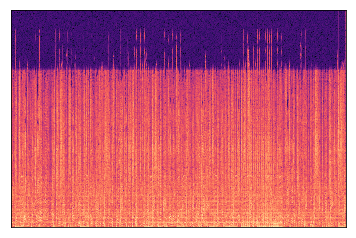

In [115]:
n = len(x)
#Convert audio to a complex valued spectrogram
spectro = librosa.core.stft(x)

#Separate out amplitude and phase from complex valued spectrogram
mag, phase = librosa.core.magphase(spectro)
#print ("mag", mag)
#print ("phase",phase)

#Get the decibal version from power spectrogram
#This is the value that should be stored for training
powerToDb = librosa.power_to_db(mag, ref=np.max)
librosa.display.specshow(powerToDb)
print ("powerToDb")
print (powerToDb)

# Get the power spectrogram from decibal version
backToSpectro = (librosa.core.db_to_power(np.load))
# Multiply power spectrogram with phase to get original complex spectrogram
backToSpectro = backToSpectro*phase

# Revert complex spectrogram to audio
y_hat = librosa.istft(backToSpectro, length = n)
ipd.Audio(data=y_hat[start*sr:end*sr], rate=sr)